------------------------

<font size=7 color='#13DAE2'>
Sebastian Carrillo Mejía
</font>
<br>
<font size=7 color='#13DAE2'>
1001414595
</font>

------------------------

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

------------------------

<font size=7 color='#13DAE2'>
Problema:
</font>

------------------------

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.






5. ¿Como puede autmatizar todo el proceso empleando pipelines?






------------------------

<font size=5 color='#13DAE2'>
1. Read Data set
</font>

------------------------

In [2]:
rawData = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
rawData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


------------------------

<font size=5 color='#13DAE2'>
2. Check, clean the data
</font>

------------------------

In [3]:
rawData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
rawData.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
# Given that the amount of null values in the variable total_bedrooms does not represent a important portion of the total entries (20640)
# We delete those rows where total bedrooms are null value

#data = rawData.copy()
data = rawData.dropna(subset=["total_bedrooms"], axis=0)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


------------------------

<font size=5 color='#13DAE2'>
3. unique elements for ocean proximity
</font>

------------------------

In [8]:
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


------------------------

<font size=5 color='#13DAE2'>
4. Mean per unique value
</font>

------------------------

In [9]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]

meanByOcearProx = data.groupby('ocean_proximity')[cols].mean()
meanByOcearProx.reset_index(inplace=True)
meanByOcearProx

,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
1,INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
2,ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
3,NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
4,NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


------------------------

<font size=5 color='#13DAE2'>
5. Histogram
</font>

------------------------

In [10]:
import seaborn as sns

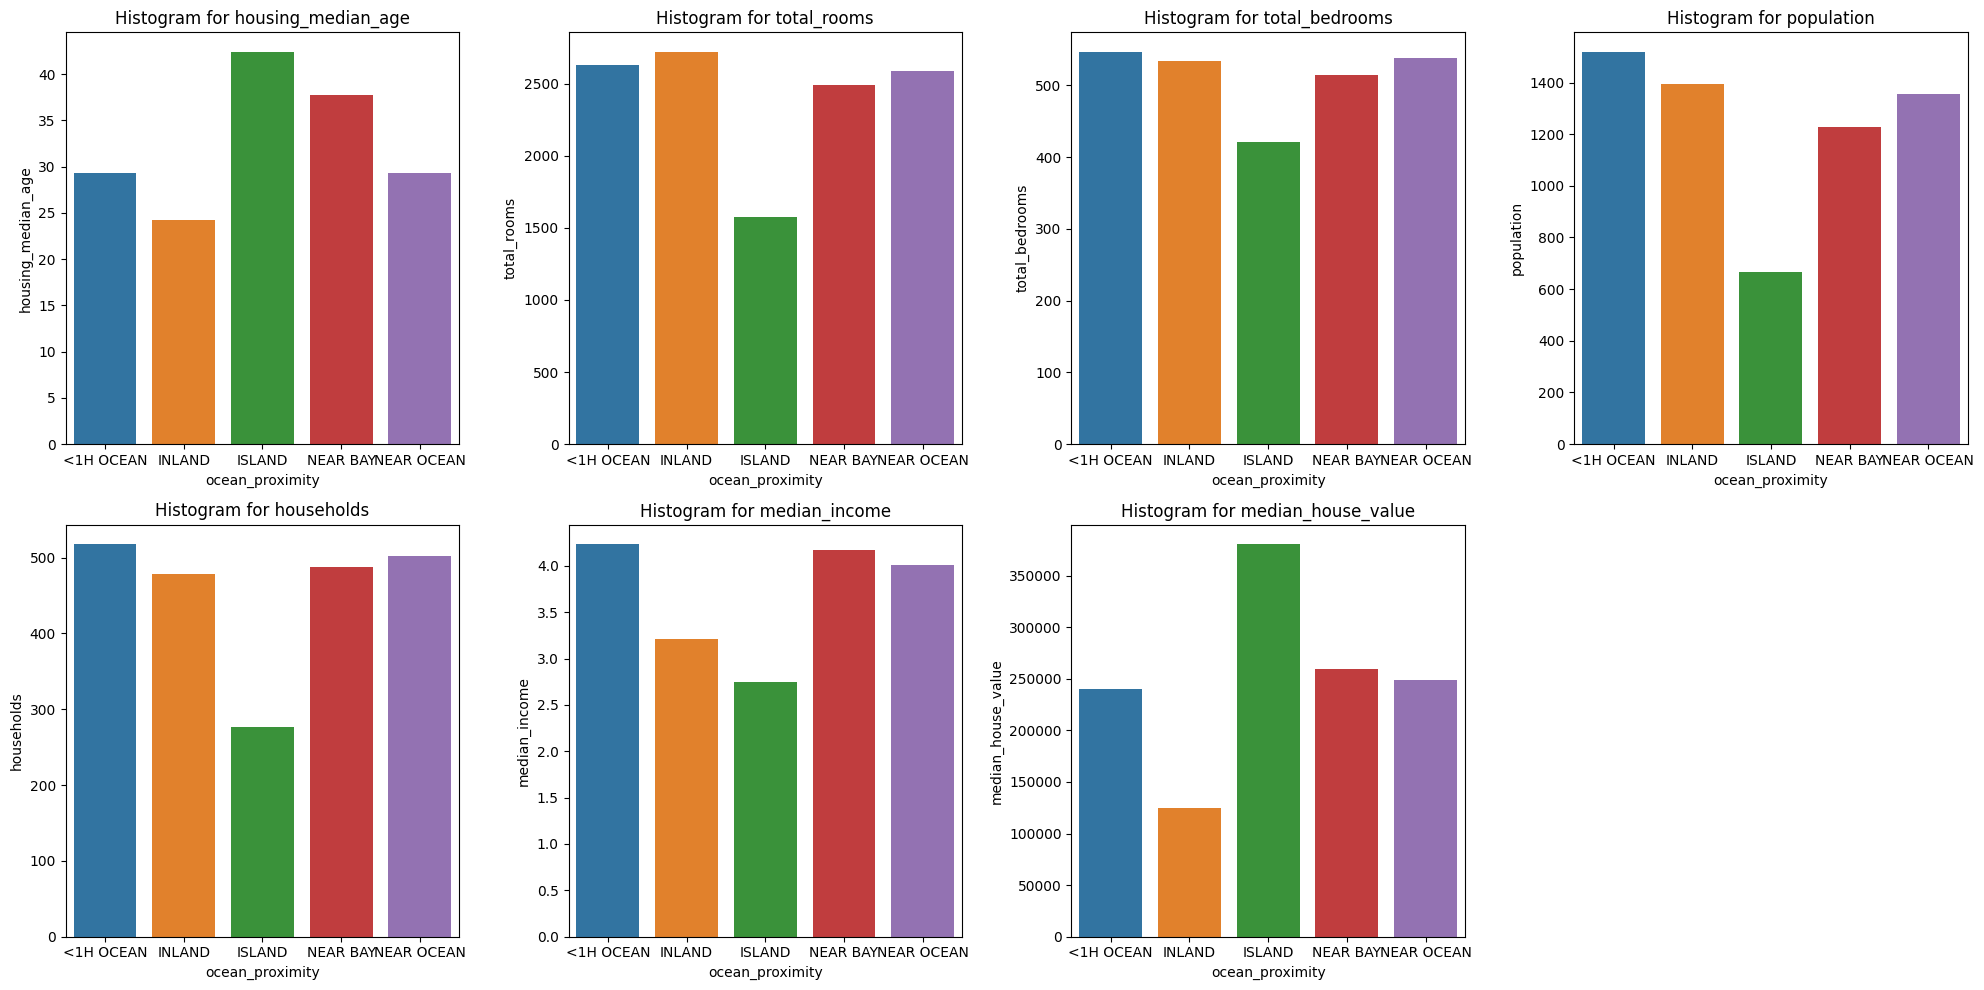

In [11]:
plt.figure(figsize=(20,10))

for i,col in enumerate(cols,start=1):
  plt.subplot(2,4,i)
  sns.barplot(data=meanByOcearProx, x='ocean_proximity',y=col, hue='ocean_proximity')
  plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()


------------------------

<font size=5 color='#13DAE2'>
7. Boxplot
</font>

------------------------

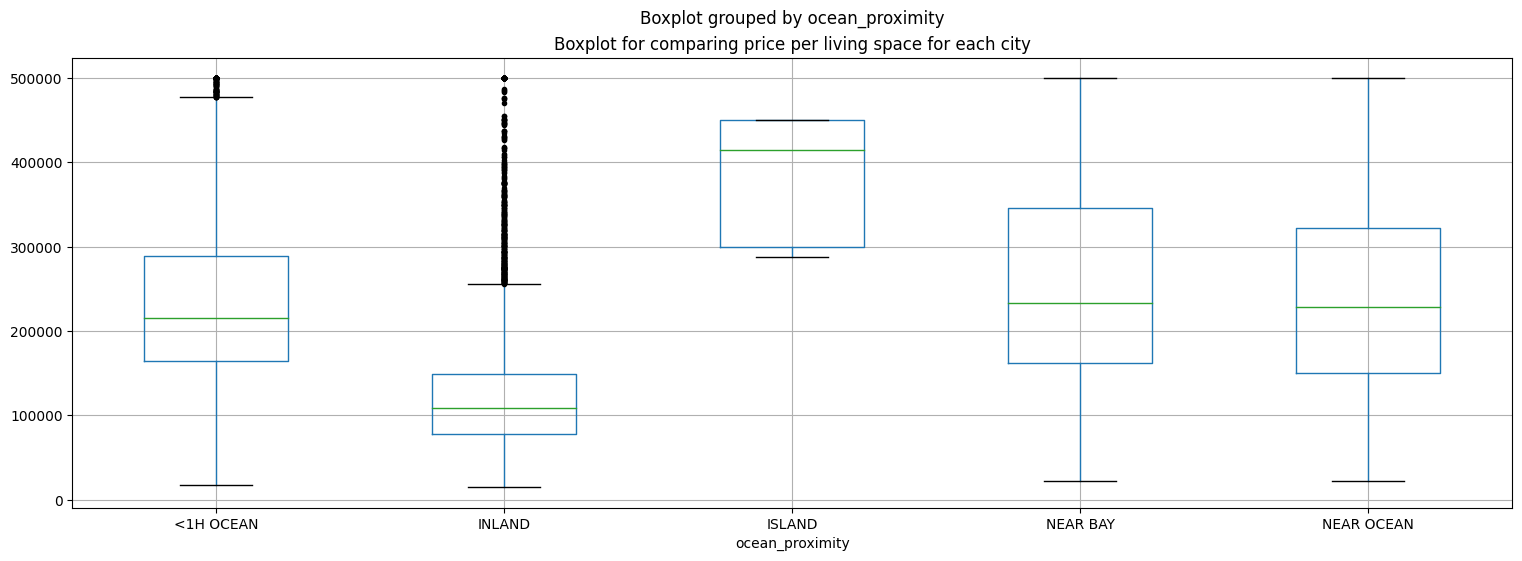

In [12]:
# draw boxplot
data.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

------------------------

<font size=5 color='#13DAE2'>
8. Correlation matrix
</font>

------------------------

In [13]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


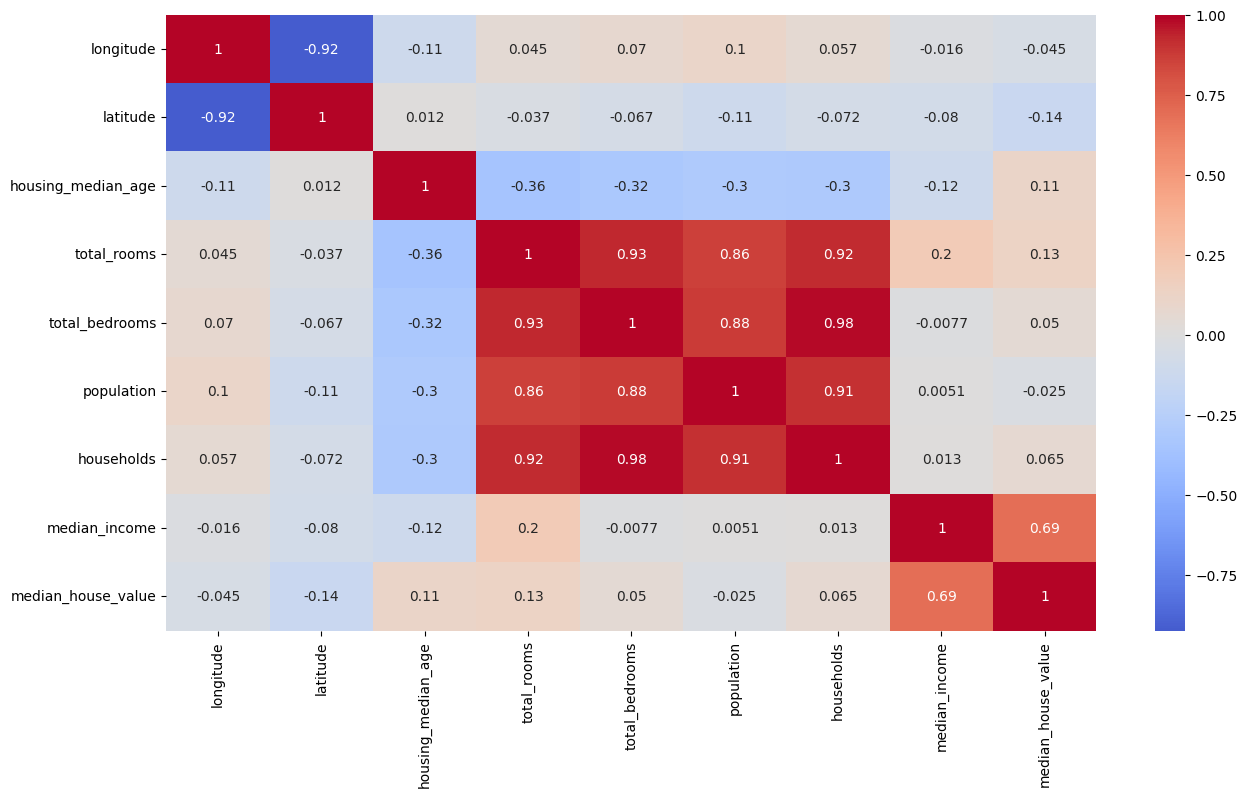

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

------------------------

<font size=5 color='#13DAE2'>
9. Paiplot
</font>

------------------------

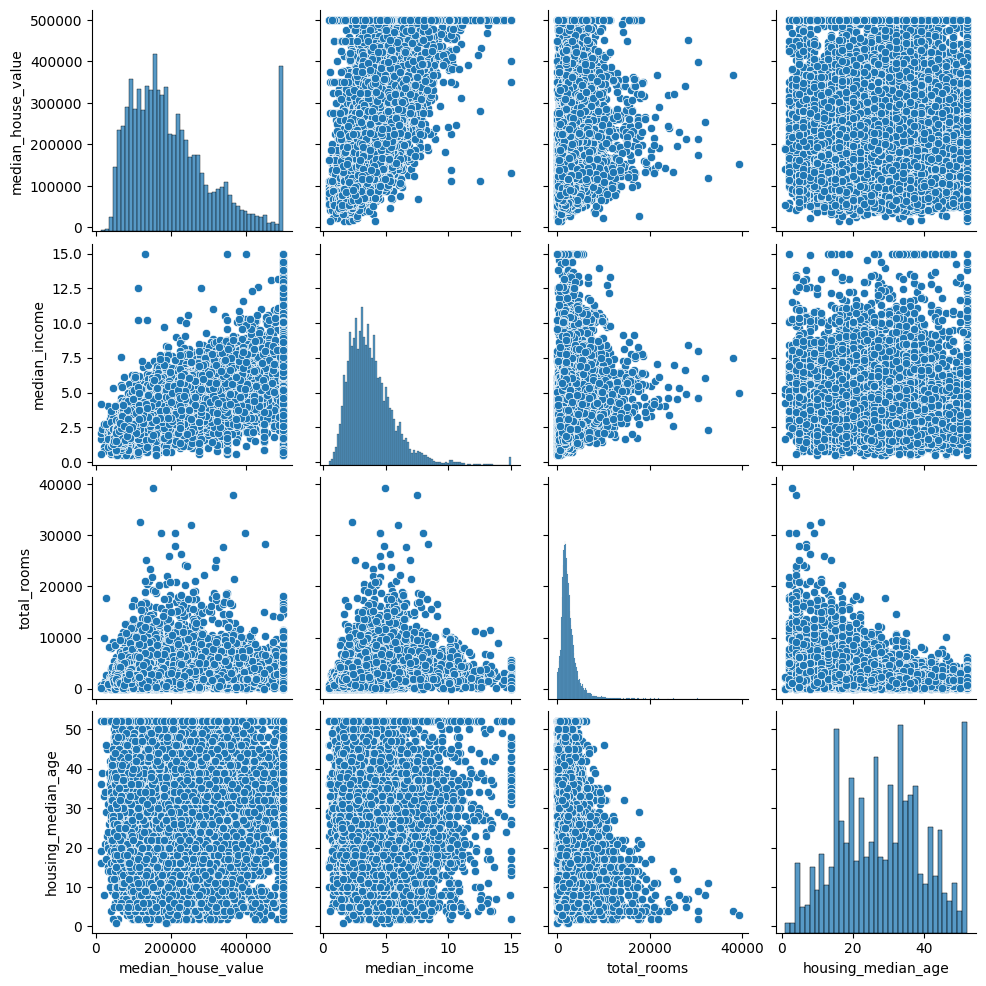

In [15]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(data[cols])
plt.show()

------------------------

<font size=5 color='#13DAE2'>
10. Scatterplot
</font>

------------------------

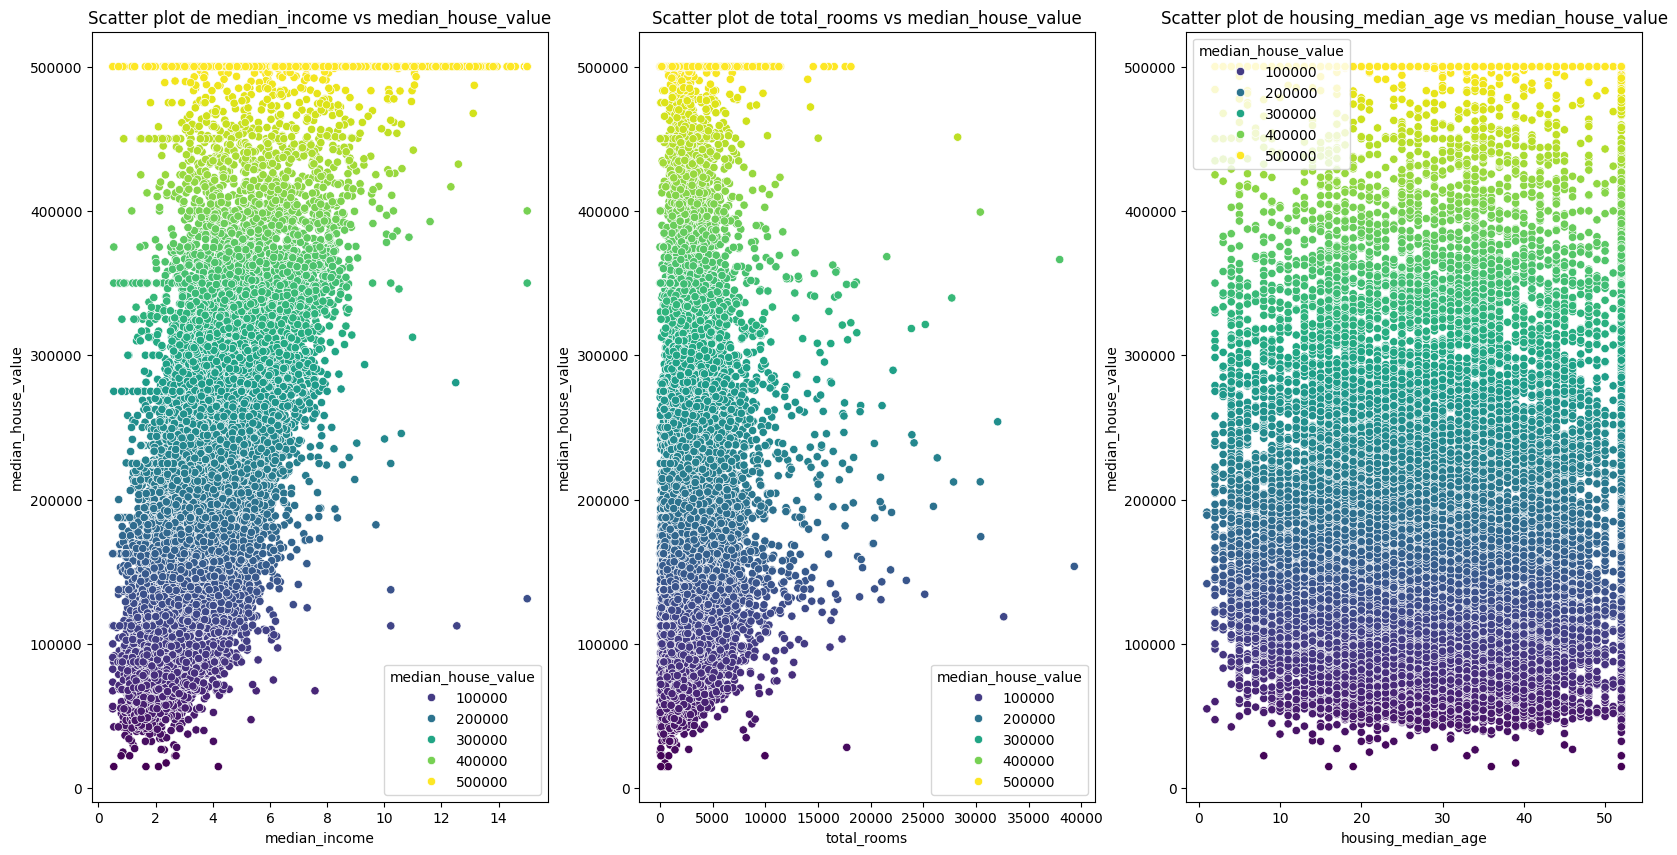

In [16]:
fig = plt.figure(figsize=(20,10))
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

for i,col in enumerate(cols,start=0):
    if col != "median_house_value":
        plt.subplot(1,3,i)
        sns.scatterplot(data=data, x=col, y="median_house_value", hue="median_house_value", palette="viridis")
        plt.title(f"Scatter plot de {col} vs median_house_value")

plt.show()

------------------------

<font size=5 color='#13DAE2'>
11. Divide the data into test and training
</font>

------------------------

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

En este caso, el 20% de los datos son tomados para hacer parte del conjunto de test, sin embargo, como se menciona en el enunciado, al ser una muestra aleatorpia, podrían existir sezgos

------------------------

<font size=5 color='#13DAE2'>
12. Stratified split
</font>

------------------------

<ipython-input-18-a99ea479af4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["income_cat"] = pd.cut(data["median_income"],


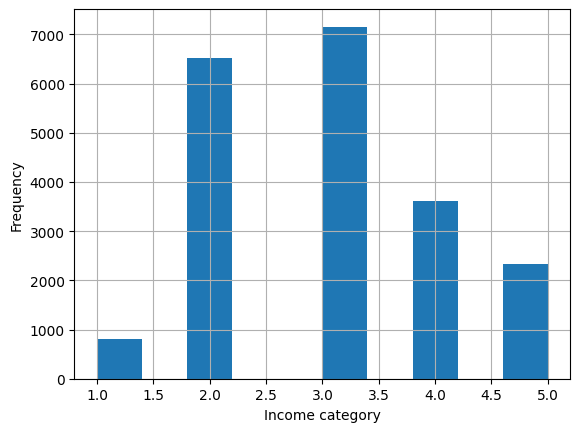

In [18]:
data.reset_index(drop=True, inplace=True)


data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


data.income_cat.hist()
plt.xlabel("Income category")
plt.ylabel("Frequency")
plt.show()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


LA siguiente celda de código, simplemente calcula las porporciones de cada una de las categorías o estratificaciones tanto en general para el data set completo como para cada uno de los datos de entrenamiento y de test.

Por último, genera unos nuevso datos de entrenamiento y test usando la forma convencional de scikit-learn y con esto calcula las proporciones que este método toma respecto a las stratificaciones previamente definidas.

ESto es útil para observar que el método estratificado sí escoge sin un sezgo las diferentes categorías, mientras que train test split no nos asegura esto.



In [20]:
data["income_cat"].value_counts() / len(data)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)


,count
income_cat,
3,0.352747
2,0.319161
4,0.175639
5,0.112138
1,0.040316


In [21]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)


compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039838,0.039883,0.038904,2.343711,0.113051
2,0.318847,0.318816,0.317348,0.470218,0.009787
3,0.350218,0.350135,0.354783,1.303667,0.023760
4,0.176724,0.176658,0.173232,1.975809,0.037478
5,0.114374,0.114509,0.115733,1.188213,0.118570


------------------------

<font size=5 color='#13DAE2'>
13. Adding new variables
</font>

------------------------

In [22]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

<ipython-input-22-c4271e581f58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rooms_per_household"] = data["total_rooms"]/data["households"]
<ipython-input-22-c4271e581f58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
<ipython-input-22-c4271e581f58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [23]:
median = data["total_bedrooms"].median()
q=data["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


In [24]:
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = data.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19570689e+02,  3.56332213e+01,  2.86330935e+01,  2.63650423e+03,
        5.37870553e+02,  1.42494695e+03,  4.99433465e+02,  3.87116160e+00,
        2.06864413e+05,  3.00694954e+00,  5.43134394e+00,  2.13038830e-01,
        3.07153285e+00])

------------------------

<font size=5 color='#13DAE2'>
14. Charatesristics Matrix
</font>

------------------------

In [27]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

------------------------

<font size=5 color='#13DAE2'>
15. Categorical variables
</font>

------------------------

In [28]:
from sklearn.preprocessing import OneHotEncoder

data["ocean_proximity"].unique()
housing_cat=data[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


En este código se convierten la variables categóricas en one hot vectors, baśicaemtne, es una forma de representar vectorialmente las cateogŕias, simplemente construimos un vector donde la cantidad de componentes es la misma cantidad de valores únicos categóricos, luego, a cada entrada le asignamos un valor categórico, basta con poner un 1 en la entrada correspondiente al valor categórico y así se sencillo se tienen unan representación vectorial de las posibes categorías.

------------------------

<font size=5 color='#13DAE2'>
16. Scaling variables
</font>

------------------------

In [29]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

------------------------

<font size=5 color='#13DAE2'>
17.
</font>

------------------------

In [30]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 17880 to 9789
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16346 non-null  float64 
 1   latitude            16346 non-null  float64 
 2   housing_median_age  16346 non-null  float64 
 3   total_rooms         16346 non-null  float64 
 4   total_bedrooms      16346 non-null  float64 
 5   population          16346 non-null  float64 
 6   households          16346 non-null  float64 
 7   median_income       16346 non-null  float64 
 8   median_house_value  16346 non-null  float64 
 9   ocean_proximity     16346 non-null  object  
 10  income_cat          16346 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [31]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4087 entries, 17971 to 3677
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4087 non-null   float64 
 1   latitude            4087 non-null   float64 
 2   housing_median_age  4087 non-null   float64 
 3   total_rooms         4087 non-null   float64 
 4   total_bedrooms      4087 non-null   float64 
 5   population          4087 non-null   float64 
 6   households          4087 non-null   float64 
 7   median_income       4087 non-null   float64 
 8   median_house_value  4087 non-null   float64 
 9   ocean_proximity     4087 non-null   object  
 10  income_cat          4087 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 355.4+ KB


In [32]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17880,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,<1H OCEAN,5
17389,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,<1H OCEAN,3
19010,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,<1H OCEAN,3
17641,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,<1H OCEAN,5
10162,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,<1H OCEAN,4


In [33]:
pd.get_dummies(data=strat_train_set, columns=["ocean_proximity"],drop_first=True, dtype=int)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17880,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5,0,0,0,0
17389,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3,0,0,0,0
19010,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3,0,0,0,0
17641,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5,0,0,0,0
10162,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17250,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2,0,0,0,1
2123,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3,1,0,0,0
7272,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2,0,0,0,0
11763,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3,1,0,0,0


In [34]:
# Define data
housing_train=pd.get_dummies(data=strat_train_set, columns=["ocean_proximity"],drop_first=True, dtype=int).drop(["median_house_value","ocean_proximity_ISLAND"],axis=1)
housing_test=pd.get_dummies(data=strat_test_set, columns=["ocean_proximity"],drop_first=True, dtype=int).drop(["median_house_value"], axis=1)

# Define targets
housing_train_target=strat_train_set["median_house_value"]
housing_test_target=strat_test_set["median_house_value"]

------------------------

<font size=5 color='#13DAE2'>
18. Linear Model and 19.
</font>

------------------------

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
model = LinearRegression()
model.fit(housing_train, housing_train_target)

LinearRegression()

In [37]:
y_pred = model.predict(housing_test)

rmse = mean_squared_error(housing_test_target, y_pred, squared=False)  # RMSE
r2 = r2_score(housing_test_target, y_pred)  # R²

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 67359.08398409109
R²: 0.6545413982571101


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El modelo empleado para pasar las variable categóricas a one hot eoncoding es una forma común para utilizar datos numéricos, sin embargo como se mostró en este notebook, también es posible usar get dummies para obtener algo similar, el problema esque la cantidad de variables son demasiadas y esto afecta gravemente a los modelos de machien learning.

El modelo de regresión lineal por como está implementado, no es realmente muy bueno.

------------------------

<font size=5 color='#13DAE2'>
20. and 21.
</font>

------------------------

El modelo de regresión lineal podría ser válido pero no para las caracteŕisticas actuales, de hecho, es posible ver que juzgando por el score  y el $R²$ obtenido, la regresión lineal no es buena realmente, además, desde la matriz de correlación que dibujamos y el pairplot, se pudo evidenciar que hay variables que no son relevatenes para predecir el target que en últimas es el precio de la vivienda, en general deberíamos descartar las características no significativas y realizar un mejor modelado.

In [ ]:
#@title Puede ser ajustado otro modelo?

Otro modelo podría ser ajustado para hacer este tipo de predicciones, realmente una red neuronal podría hacer un mejro trabajo, incluso, se podría pensar en discretizar el problema, distribuir lso precios de las casas por rangos, y de esta manera, no predecir con exactitud un precio sino en un rango, que corresponde a una categoría discreta, haciendo esta modificación, tal vez sería posible aumentar la significacia de las características respect al rango de precio y de hecho al perder esta precición también el score debería aumentar.

POr otro lado, daso el caso de discretizar, podríamos pasarnos a variables categóricas en el target y usar regression logística por ejemplo que no tiene un comportamiento lineal y sigue para hacer clasificaciones, o incluso se podría implementar una red neural.